In [1]:
### NB: Much of what is included below draws on examples from the "NLTK Book" (https://www.nltk.org/book/ch01.html) Steven Bird, Ewan Klein, and Edward Loper. Highly recommended to continue with the kinds of work introduced in the workshop. 

In [2]:
## Imports

from cltkreaders.readers import PerseusTreebankCorpusReader
from pprint import pprint

In [3]:
# Setup corpus

PT = PerseusTreebankCorpusReader('../data/texts/', '.*\.xml')

In [4]:
# Sample xml text

sample_doc = next(PT.docs())
print(sample_doc[8273:9182])

</header>
  <body>
    <sentence subdoc="1.1-1.7" id="2274106" document_id="urn:cts:greekLit:tlg0012.tlg001.perseus-grc1">
      <primary>millermo</primary>
      <primary>tovahk</primary>
      <secondary>nicanor</secondary>
      <word id="1" form="μῆνιν" lemma="μῆνις" postag="n-s---fa-" head="2" relation="OBJ" cite="urn:cts:greekLit:tlg0012.tlg001:1.1"/>
      <word id="2" form="ἄειδε" lemma="ἀείδω" postag="v2spma---" head="32" relation="PRED_CO" cite="urn:cts:greekLit:tlg0012.tlg001:1.1"/>
      <word id="3" form="θεὰ" lemma="θεά" postag="n-s---fv-" head="2" relation="ExD" cite="urn:cts:greekLit:tlg0012.tlg001:1.1"/>
      <word id="4" form="Πηληϊάδεω" lemma="Πηληιάδης" postag="n-s---mg-" head="5" relation="ATR" cite="urn:cts:greekLit:tlg0012.tlg001:1.1"/>
      <word id="5" form="Ἀχιλῆος" lemma="Ἀχιλλεύς" postag="n-s---mg-" head="1" relation="ATR" cite="urn:cts:greekLit:tlg0012.tlg001:1.1"/>


In [5]:
# Show sample words

words = PT.words()

print(next(words))
print(next(words))
print(next(words))
print(next(words))
print(next(words))

μῆνιν
ἄειδε
θεὰ
Πηληϊάδεω
Ἀχιλῆος


In [6]:
# Organize text

iliad_text = " ".join(PT.words())
iliad_text[:150]

'μῆνιν ἄειδε θεὰ Πηληϊάδεω Ἀχιλῆος οὐλομένην , ἣ μυρί̓ Ἀχαιοῖς ἄλγἐ ἔθηκε , πολλὰς δ̓ ἰφθίμους ψυχὰς Ἄϊδι προΐαψεν ἡρώων , αὐτοὺς δὲ ἑλώρια τεῦχε κύνε'

In [7]:
# Preprocess text

from texttools import preprocess
iliad_text = preprocess(iliad_text)
iliad_text[:150]

'μῆνιν ἄειδε θεὰ πηληϊάδεω ἀχιλῆος οὐλομένην ἣ μυρί̓ ἀχαιοῖς ἄλγἐ ἔθηκε πολλὰς δ̓ ἰφθίμους ψυχὰς ἄϊδι προΐαψεν ἡρώων αὐτοὺς δὲ ἑλώρια τεῦχε κύνεσσιν οἰ'

In [8]:
# Tokenize text
iliad_tokens = iliad_text.split()
print(iliad_tokens[:15])

['μῆνιν', 'ἄειδε', 'θεὰ', 'πηληϊάδεω', 'ἀχιλῆος', 'οὐλομένην', 'ἣ', 'μυρί̓', 'ἀχαιοῖς', 'ἄλγἐ', 'ἔθηκε', 'πολλὰς', 'δ̓', 'ἰφθίμους', 'ψυχὰς']


In [9]:
# Make a Text object with NLTK

from nltk import Text
iliad_Text = Text(iliad_tokens)
iliad_Text

<Text: μῆνιν ἄειδε θεὰ πηληϊάδεω ἀχιλῆος οὐλομένην ἣ μυρί̓...>

In [10]:
# Check type of Text object

type(iliad_Text)

nltk.text.Text

In [11]:
# Get collocations

collocations = iliad_Text.collocation_list(num=5)

for collocation in collocations:
    print(' '.join(collocation))

ἔπεα πτερόεντα
πτερόεντα προσηύδα
ἠμείβετ̓ ἔπειτα
ἄναξ ἀνδρῶν
βοὴν ἀγαθὸς


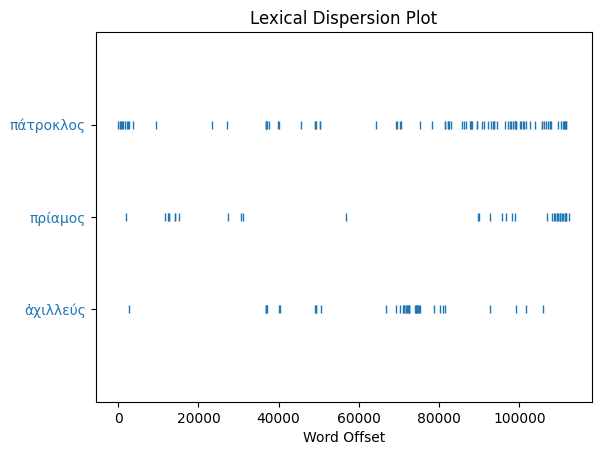

In [12]:
# Make a dispersion plot

displot = iliad_Text.dispersion_plot(['ἀχιλλεύς', 'πρίαμος', 'πάτροκλος'])

In [13]:
# Make lemmatized Text object

tokenized_sents = PT.tokenized_sents()

all_lemmas = []
for sent in tokenized_sents:
    for token in sent:
        if token[1]:
            lemma = preprocess(token[1])
            if lemma:
                all_lemmas.append(preprocess(token[1], remove_spaces=True))

iliad_lemmatized_Text = Text(all_lemmas)        

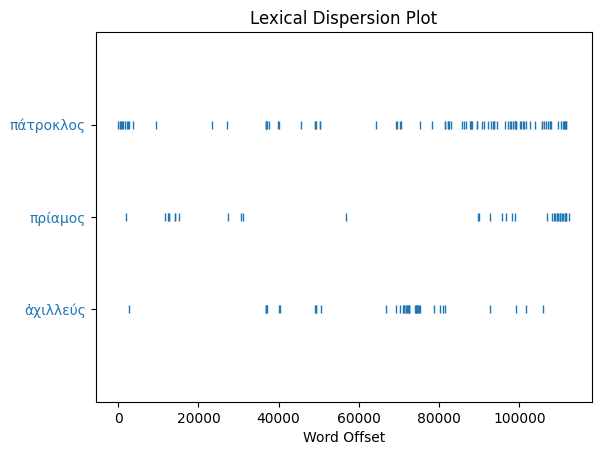

In [14]:
# Before, unlemmatized

displot = iliad_Text.dispersion_plot(['ἀχιλλεύς', 'πρίαμος', 'πάτροκλος'])

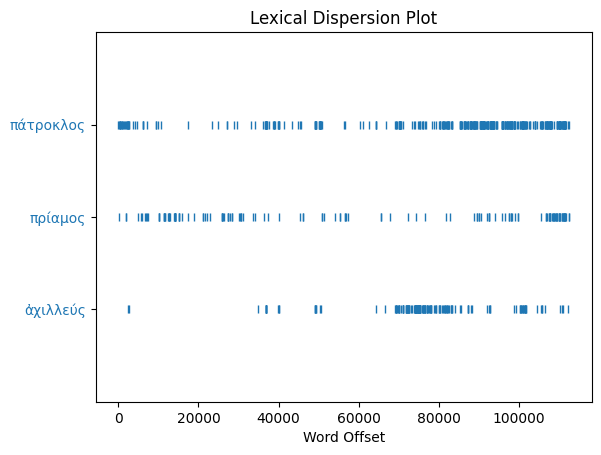

In [15]:
# After, lemmatized

displot = iliad_lemmatized_Text.dispersion_plot(['ἀχιλλεύς', 'πρίαμος', 'πάτροκλος'])

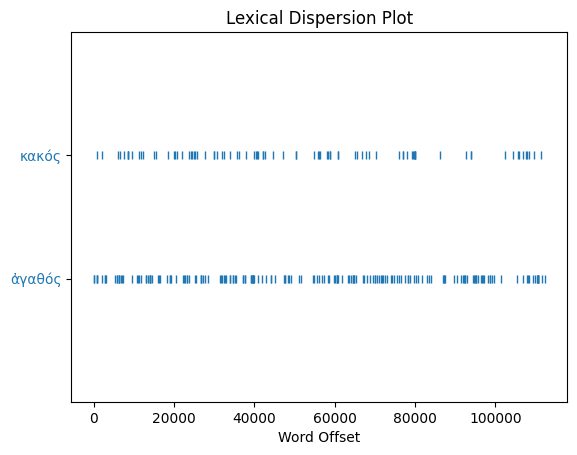

In [16]:
# Other ideas

displot = iliad_lemmatized_Text.dispersion_plot(['ἀγαθός', 'κακός'])

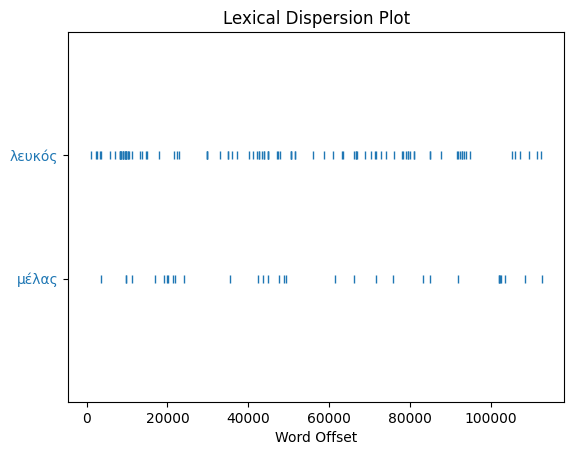

In [17]:
# Other ideas

displot = iliad_lemmatized_Text.dispersion_plot(['μέλας', 'λευκός'])

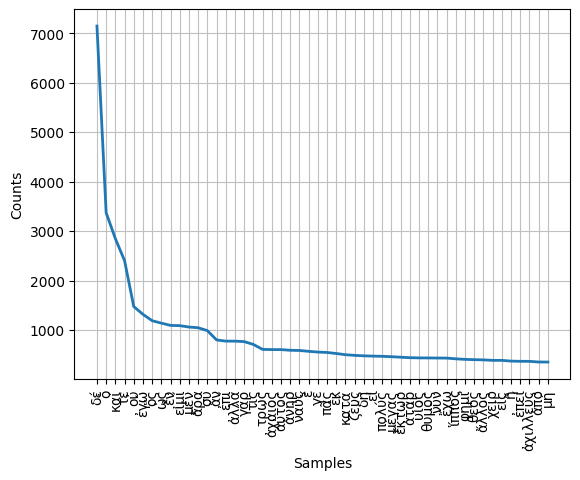

In [18]:
# Plot freqs

from nltk import FreqDist
freqs = FreqDist(iliad_lemmatized_Text)
freqs.plot(50, cumulative=False);

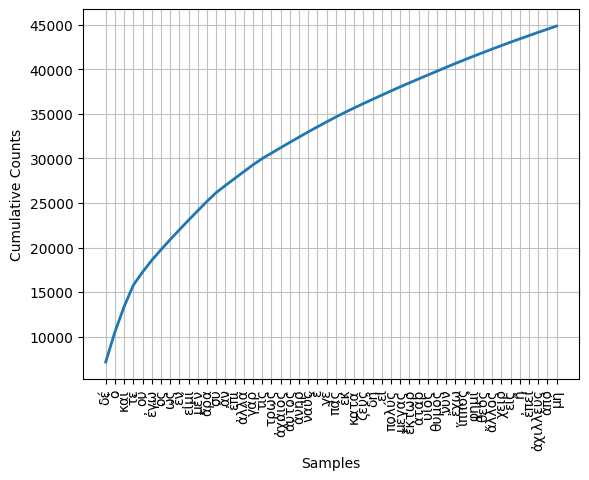

In [19]:
# Plot freqs, cumulative

freqs.plot(50, cumulative=True);